In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from google.colab import drive
drive.mount('/content/drive')
mydata_path = '/content/drive/MyDrive/Teaching/ML_Finance/Python/Data/'


Mounted at /content/drive


In [2]:
data1 = pd.read_csv(mydata_path + 'country_risk.csv')

data1.head()

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713


In [3]:
data1.head(10)

,Country,Abbrev,Corruption,Peace,Legal,GDP Growth
0,Albania,AL,35,1.821,4.546,2.983
1,Algeria,DZ,35,2.219,4.435,2.553
2,Argentina,AR,45,1.989,5.087,-3.061
3,Armenia,AM,42,2.294,4.812,6.000
4,Australia,AU,77,1.419,8.363,1.713
5,Austria,AT,77,1.291,8.089,1.605
6,Azerbaijan,AZ,30,2.425,5.120,2.700
7,Bahrain,BH,42,2.357,6.195,1.982
8,Bangladesh,BD,26,2.128,3.313,7.792
9,Belgium,BE,75,1.533,7.669,1.214


In [4]:
#summary statistics
data1.describe()

,Corruption,Peace,Legal,GDP Growth
count,121.000000,121.000000,121.000000,121.000000
mean,46.842975,2.001017,5.752529,2.657529
std,18.702499,0.461485,1.373932,2.563741
min,15.000000,1.072000,2.671000,-9.459000
25%,33.000000,1.699000,4.785000,1.249000
50%,41.000000,1.939000,5.455000,2.600000
75%,60.000000,2.294000,6.488000,4.000000
max,87.000000,3.369000,8.712000,7.800000


In [ ]:
data1.corr(numeric_only=True)

,Corruption,Peace,Legal,GDP Growth
Corruption,1.000000,-0.705002,0.938512,-0.123545
Peace,-0.705002,1.000000,-0.662233,-0.004428
Legal,0.938512,-0.662233,1.000000,-0.150369
GDP Growth,-0.123545,-0.004428,-0.150369,1.000000


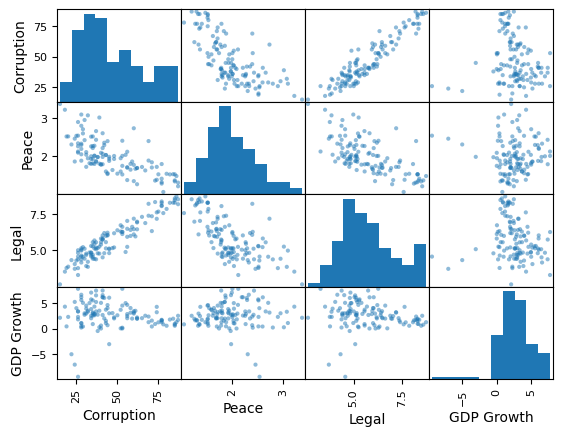

In [ ]:
pd.plotting.scatter_matrix(data1[['Corruption', 'Peace', 'Legal', 'GDP Growth']]);

In [5]:
# We choose only 3 variables for our analysis, we drop 'Corruption' because it is highly correlated with 'Peace'
X = data1[['Peace', 'Legal', 'GDP Growth']]
#Z-score scaling
X = (X - X.mean())/X.std()
X.head()
X.describe()

,Peace,Legal,GDP Growth
count,1.210000e+02,1.210000e+02,1.210000e+02
mean,-5.541940e-16,-1.156100e-16,-1.357959e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.013102e+00,-2.242855e+00,-4.726112e+00
25%,-6.544448e-01,-7.042046e-01,-5.494037e-01
50%,-1.343847e-01,-2.165529e-01,-2.243944e-02
75%,6.348709e-01,5.353040e-01,5.236375e-01
max,2.964307e+00,2.154016e+00,2.005846e+00


[360.00000000000006, 223.66012411834961, 169.24242908631015, 128.51328371922548, 101.32353117755505, 79.89853632027034, 69.12681703378564, 66.13929827307298, 57.41921351429751]


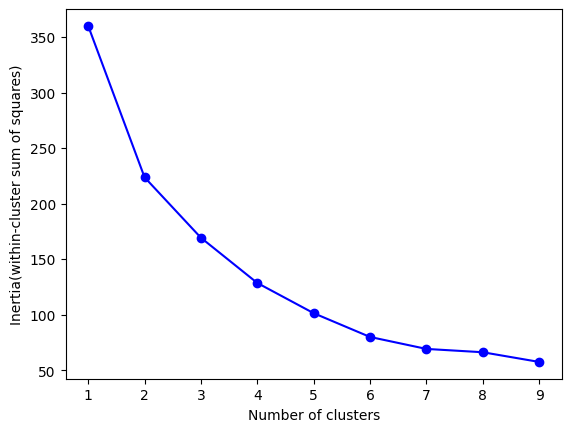

In [6]:
#Finding K based on Elbow Method

Ks = range(1,10)

inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

print(inertia)


plt.plot(Ks, inertia, '-bo');
plt.xlabel('Number of clusters');
plt.ylabel('Inertia(within-cluster sum of squares)');

In [7]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

raw_output = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    raw_output.append([n_clusters, silhouette_avg])

silhouette_results = pd.DataFrame(raw_output, columns=["Number of Clusters", "Average Silhouette Score"])
silhouette_results

,Number of Clusters,Average Silhouette Score
0,2,0.350914
1,3,0.352880
2,4,0.316268
3,5,0.276952
4,6,0.335825
5,7,0.311002
6,8,0.350103
7,9,0.345969
8,10,0.317268


In [8]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 1)
kmeans.fit(X)

centers = kmeans.cluster_centers_
y = kmeans.labels_

print("inertia for k = 3 is", kmeans.inertia_)
print("cluster centers: ", centers)
print("cluster labels: " , y)

y.shape

inertia for k = 3 is 161.2893804348309
cluster centers:  [[ 1.22973303 -0.68496051 -0.94125294]
 [ 0.16803028 -0.59729967  0.69048743]
 [-0.85097477  1.02149992 -0.23897931]]
cluster labels:  [1 1 0 1 2 2 1 0 1 2 1 1 1 2 0 1 0 1 2 0 2 1 0 2 1 2 2 0 2 1 0 1 1 2 1 2 2
 1 1 2 1 1 1 1 2 2 1 1 0 2 0 2 2 2 2 1 1 2 2 2 0 0 2 1 1 2 1 1 2 0 1 1 1 1
 1 2 2 0 0 2 2 0 1 0 1 1 2 2 2 2 0 1 0 1 1 1 2 2 2 0 2 1 2 2 2 1 1 1 0 1 0
 1 0 2 2 2 2 1 0 1 0]


(121,)

In [9]:
center_mat = pd.DataFrame(centers, columns = ['Peace', 'Legal', 'GDP Growth'], index = ['High risk', 'Moderate risk','Low risk'])

center_mat

,Peace,Legal,GDP Growth
High risk,1.229733,-0.684961,-0.941253
Moderate risk,0.168030,-0.597300,0.690487
Low risk,-0.850975,1.021500,-0.238979


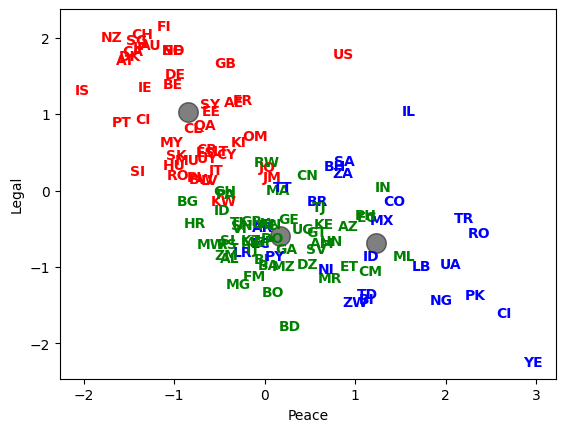

In [ ]:
x_1 = 0
x_2 = 1
colors = ['blue','green', 'red']
labels = ['Peace', 'Legal', 'GDP Growth']

plt.scatter(X.iloc[:,x_1], X.iloc[:,x_2], c = y, s = 0, alpha = 0)
plt.scatter(centers[:,x_1], centers[:,x_2], c = 'black', s = 200, alpha = 0.5)
for j in range(X.shape[0]):
    plt.text(X.iloc[j,x_1], X.iloc[j,x_2], data1['Abbrev'].iloc[j], color = colors[y[j]],
             weight = 'semibold', horizontalalignment = 'center', verticalalignment = 'center')
plt.xlabel(labels[x_1])
plt.ylabel(labels[x_2]);

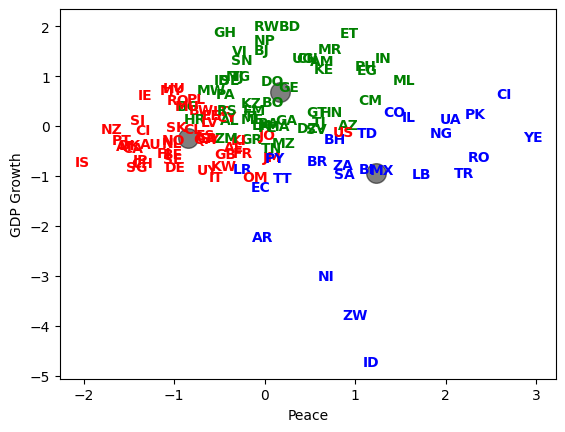

In [ ]:
x_1 = 0
x_2 = 2

plt.scatter(X.iloc[:,x_1], X.iloc[:,x_2], c = y, s = 0, alpha = 0)
plt.scatter(centers[:,x_1], centers[:,x_2], c = 'black', s = 200, alpha = 0.5)
for j in range(X.shape[0]):
    plt.text(X.iloc[j,x_1], X.iloc[j,x_2], data1['Abbrev'].iloc[j], color = colors[y[j]],
             weight = 'semibold', horizontalalignment = 'center', verticalalignment = 'center')
plt.xlabel(labels[x_1])
plt.ylabel(labels[x_2]);

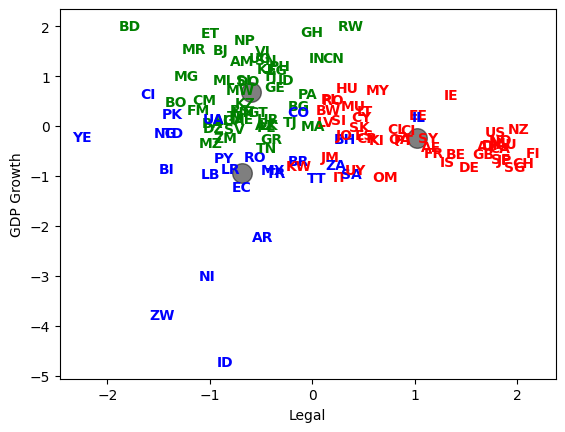

In [ ]:
x_1 = 1
x_2 = 2

plt.scatter(X.iloc[:,x_1], X.iloc[:,x_2], c = y, s = 0, alpha = 0)
plt.scatter(centers[:,x_1], centers[:,x_2], c = 'black', s = 200, alpha = 0.5)
for j in range(X.shape[0]):
    plt.text(X.iloc[j,x_1], X.iloc[j,x_2], data1['Abbrev'].iloc[j], color = colors[y[j]],
             weight = 'semibold', horizontalalignment = 'center', verticalalignment = 'center')
plt.xlabel(labels[x_1])
plt.ylabel(labels[x_2]);

In [12]:
#Principal Component Analysis - Bond Data
bonds = pd.read_csv(mydata_path + 'bonds.csv')

bonds.shape

bonds
bonds.drop(columns = ['date'], inplace = True)


bonds2 = bonds.diff().dropna()

bonds2


,1yr,2yr,3yr,5yr,7yr,10yr,20yr,30yr
1,-0.04,-0.08,-0.09,-0.09,-0.08,-0.08,-0.06,-0.06
2,-0.01,0.00,0.03,0.04,0.05,0.08,0.09,0.11
3,0.00,0.02,0.02,0.02,0.00,0.00,-0.01,-0.01
4,-0.03,-0.07,-0.06,-0.05,-0.02,-0.02,-0.01,0.01
5,-0.02,-0.01,-0.01,0.01,0.01,0.02,0.03,0.04
...,...,...,...,...,...,...,...,...
2627,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.02
2628,-0.01,0.00,0.00,-0.02,-0.03,-0.04,-0.06,-0.07
2629,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.01
2630,0.00,0.00,-0.01,-0.02,-0.03,-0.05,-0.07,-0.07


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca.fit(bonds2)

pca.explained_variance_ratio_

pca_variance = pd.DataFrame([pca.explained_variance_, pca.explained_variance_ratio_], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'] ,index = ['Variance', 'Ratio'])
pca_variance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Variance,0.013328,0.001259,0.000316,0.000155,0.000082,0.000048,0.000039,0.000032
Ratio,0.873465,0.082483,0.020685,0.010173,0.005381,0.003156,0.002551,0.002106


In [14]:
pca.explained_variance_.sum()

pca.explained_variance_[0]/pca.explained_variance_.sum()

0.8734649202717736

In [15]:
pca_loading = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8'])
pca_loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.082626,-0.241857,0.684755,0.681678,-0.006066,0.024937,0.020666,0.004156
1,0.210423,-0.464884,0.376172,-0.573751,-0.517449,0.030870,-0.011497,0.008445
2,0.285945,-0.466775,0.006199,-0.184589,0.727697,-0.346549,-0.105685,0.073738
3,0.386277,-0.315024,-0.331865,0.144870,0.060647,0.604366,0.347601,-0.361477
4,0.429581,-0.099154,-0.349419,0.264877,-0.266395,0.007939,-0.263366,0.687738
5,0.427628,0.119292,-0.152695,0.171636,-0.269301,-0.515302,-0.254381,-0.589373
6,0.426412,0.394100,0.172055,-0.098668,0.026581,-0.243962,0.721867,0.205435
7,0.410716,0.478427,0.323141,-0.204230,0.234081,0.433536,-0.460740,-0.035505


In [16]:
Z = data1[['Corruption','Peace', 'Legal', 'GDP Growth']]
Z = (Z - Z.mean())/Z.std()
Z.head()

,Corruption,Peace,Legal,GDP Growth
0,-0.633230,-0.390081,-0.878158,0.126952
1,-0.633230,0.472352,-0.958948,-0.040772
2,-0.098542,-0.026039,-0.484397,-2.230541
3,-0.258948,0.634871,-0.684553,1.303747
4,1.612460,-1.261182,1.900001,-0.368418


In [17]:
pca_c = PCA(n_components=4)
pca_c.fit(Z)

pca_country = pd.DataFrame(pca_c.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4'], index = ['Corruption', 'Peace', 'Legal', 'GDP Growth'])

pca_country



,PC1,PC2,PC3,PC4
Corruption,0.601885,0.015121,0.328249,0.727845
Peace,-0.523613,-0.200847,0.825394,0.064926
Legal,0.594034,-0.021927,0.425196,-0.682533
GDP Growth,-0.103386,0.979261,0.173741,-0.013205


In [18]:
pca_country_var = pd.DataFrame([pca_c.explained_variance_, pca_c.explained_variance_ratio_], columns = ['PC1', 'PC2', 'PC3', 'PC4']
                           ,index = ['Variance', 'Ratio'])
pca_country_var

,PC1,PC2,PC3,PC4
Variance,2.560812,1.002367,0.377552,0.059268
Ratio,0.640203,0.250592,0.094388,0.014817
